# In the land of sleep analysis
- Used the fitbit API to collect personal sleep data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime

%matplotlib inline

In [4]:
# import data previously collected and saved as csv
slsummaryall_df = pd.read_csv('./downloads/slsummarystagesall20180501.csv')

In [6]:
# add day of the week to the dataframe
slsummaryall_df['Date'] = pd.to_datetime(slsummaryall_df['Date'])
slsummaryall_df['DOW'] = slsummaryall_df['Date'].dt.weekday_name

In [7]:
# quick look at the dataframe
slsummaryall_df.head()

,Date,Duration,Efficiency,MainSleep,Minutes Asleep,Minutes Awake,Sleep_Deep,Sleep_Light,Sleep_REM,Sleep_stage_Wake,Sleep_stage_Wake_Count,Time in Bed,DOW
0,2018-04-18,35040000,92,True,508,76,36,399,73,76,25,584,Wednesday
1,2018-04-20,30420000,95,True,433,74,31,342,60,74,33,507,Friday
2,2018-04-21,29520000,94,True,411,81,48,309,54,81,22,492,Saturday
3,2018-04-23,28500000,94,True,401,74,87,206,108,74,18,475,Monday
4,2018-04-23,28500000,94,True,401,74,87,206,108,74,18,475,Monday


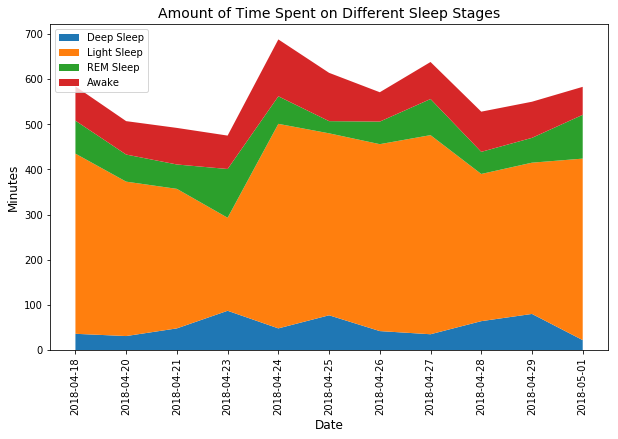

In [4]:
# plot stacked area chart for different sleep stages
x = slsummaryall_df['Date']
y_df = slsummaryall_df[['Sleep_Deep', 'Sleep_Light', 'Sleep_REM', 'Sleep_stage_Wake']]
y = y_df.values.T

fig = plt.figure(figsize=(10, 6))

plt.title('Amount of Time Spent on Different Sleep Stages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Minutes', fontsize=12)
plt.xticks(rotation=90)

plt.stackplot(x, y, labels=['Deep Sleep', 'Light Sleep', 'REM Sleep', 'Awake'])
plt.legend(loc='upper left')
plt.show()

In [9]:
grouped_DOW = slsummaryall_df.groupby('DOW').mean()
grouped_DOW = grouped_DOW.reindex(index = ['Monday','Tuesday','Wednesday', 'Thursday',
                                           'Friday', 'Saturday', 'Sunday'])
grouped_DOW = grouped_DOW.reset_index()
grouped_DOW

,DOW,Duration,Efficiency,MainSleep,Minutes Asleep,Minutes Awake,Sleep_Deep,Sleep_Light,Sleep_REM,Sleep_stage_Wake,Sleep_stage_Wake_Count,Time in Bed
0,Monday,28500000.0,94.0,True,401.0,74.0,87.0,206.0,108.0,74.0,18.0,475.0
1,Tuesday,38130000.0,94.0,True,541.5,94.0,35.0,427.5,79.0,94.0,25.5,635.5
2,Wednesday,35940000.0,93.0,True,507.5,91.5,56.5,401.0,50.0,91.5,27.5,599.0
3,Thursday,34260000.0,94.0,True,506.0,65.0,42.0,414.0,50.0,65.0,22.0,571.0
4,Friday,34350000.0,93.5,True,494.5,78.0,33.0,391.5,70.0,78.0,35.0,572.5
5,Saturday,30600000.0,94.5,True,425.0,85.0,56.0,317.5,51.5,85.0,21.5,510.0
6,Sunday,33000000.0,95.0,True,470.0,80.0,80.0,335.0,55.0,80.0,31.0,550.0


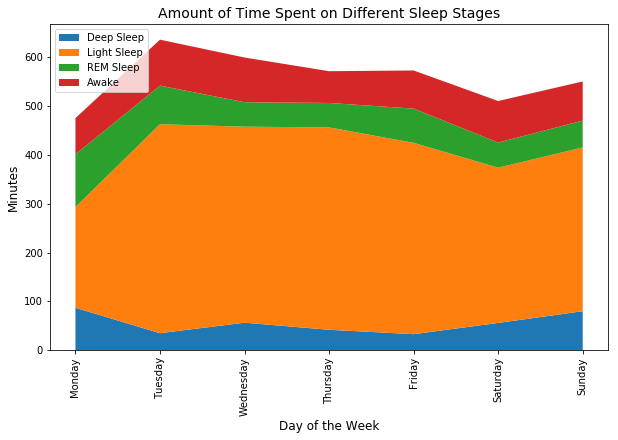

In [10]:
# plot stacked area chart for different sleep stages by day of the week
x = grouped_DOW.index
y_df = grouped_DOW[['Sleep_Deep', 'Sleep_Light', 'Sleep_REM', 'Sleep_stage_Wake']]
y = y_df.values.T

fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Amount of Time Spent on Different Sleep Stages', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Minutes', fontsize=12)

weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(weekday_list, rotation=90)

plt.stackplot(x, y, labels=['Deep Sleep', 'Light Sleep', 'REM Sleep', 'Awake'])
plt.legend(loc='upper left')
plt.show()

In [5]:
# prepare dataframe to look at correlations

renamed_df = slsummaryall_df.rename(columns = {
    'Sleep_Deep':'Deep Sleep',
    'Sleep_Light': 'Light Sleep',
    'Sleep_REM': 'REM Sleep',
    'Sleep_stage_Wake_Count':'Number of Awakenings'
})

corr_df = renamed_df[['Date', 'Efficiency', 'Minutes Asleep',
                           'Deep Sleep', 'Light Sleep', 'REM Sleep',
                           'Minutes Awake', 'Number of Awakenings',
                           'Time in Bed'
                          ]]

corr_df.corr()

,Efficiency,Minutes Asleep,Deep Sleep,Light Sleep,REM Sleep,Minutes Awake,Number of Awakenings,Time in Bed
Efficiency,1.000000,-0.386490,0.410998,-0.277720,-0.362839,0.344260,-0.004230,-0.243940
Minutes Asleep,-0.386490,1.000000,-0.523391,0.929471,-0.243406,0.375640,0.558245,0.968962
Deep Sleep,0.410998,-0.523391,1.000000,-0.672892,0.068740,0.205150,-0.263573,-0.399980
Light Sleep,-0.277720,0.929471,-0.672892,1.000000,-0.498540,0.350069,0.605514,0.900869
REM Sleep,-0.362839,-0.243406,0.068740,-0.498540,1.000000,-0.462885,-0.444330,-0.334933
Minutes Awake,0.344260,0.375640,0.205150,0.350069,-0.462885,1.000000,0.469130,0.593085
Number of Awakenings,-0.004230,0.558245,-0.263573,0.605514,-0.444330,0.469130,1.000000,0.610120
Time in Bed,-0.243940,0.968962,-0.399980,0.900869,-0.334933,0.593085,0.610120,1.000000


In [6]:
# define heatmap function
def heatmap(df, anchor_val):
    sns.set(style = "white", font_scale=1.4)
    corrd = df.corr()
    mask = np.zeros_like(corrd, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(12, 8))
    cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
    sns.heatmap(corrd, mask=mask, cmap=cmap, vmax=anchor_val,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

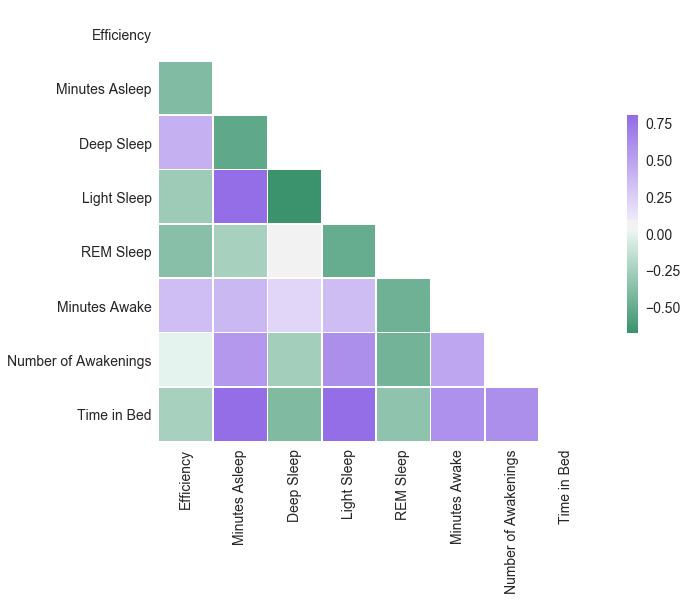

In [7]:
# plot heatmap to look at correlations between stats
heatmap(corr_df, .8)

Interesting...
> Deep sleep is inversely correlated with light sleep and slightly correlated with REM sleep <br>
> Efficiency is positively correlated with deep sleep <br>
> REM sleep also inversely correlated with light sleep but positively correlated with deep sleep! <br>
> Number of awakenings and minutes awake are positively correlated with time in bed

Curious to see what happens with more data.

In [8]:
# define function to read files and add date components
def read_files_from_path(path):
    dflist = []
    my_dir = os.listdir(path)
    csvs = [d for d in my_dir if d[-4:] == '.csv']
    for c in csvs:
        df = pd.read_csv(path+c, index_col=None, header=0)
        df['date'] = c[-12:-4]
        year, month, day = int(c[-12:-8]), int(c[-8:-6]), int(c[-6:-4])
        df['year'] = year
        df['month'] = month
        df['day'] = day
        df['DOW'] = datetime.date(year, month, day).strftime('%A')
        df['DOW'] = pd.Categorical(df['DOW'],
                                  categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                              'Friday', 'Saturday', 'Sunday'],
                                  ordered=True)
        dflist.append(df)
    df_all = pd.concat(dflist)
    return df_all

In [9]:
df = read_files_from_path('/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit-master/downloads/sleep/')

In [10]:
df.head()

,Stage,Time,date,year,month,day,DOW
0,wake,21:43:00,20180428,2018,4,28,Saturday
1,light,21:53:30,20180428,2018,4,28,Saturday
2,wake,22:06:00,20180428,2018,4,28,Saturday
3,light,22:18:00,20180428,2018,4,28,Saturday
4,deep,22:20:00,20180428,2018,4,28,Saturday


In [11]:
sl20180416_df = pd.read_csv('./downloads/sleep/sleepstages20180416.csv', index_col=None, header=0)
sl20180416_df.head()

,Stage,Time
0,wake,21:21:30
1,light,21:28:30
2,rem,22:28:00
3,light,22:37:00
4,rem,23:38:00


In [12]:
hr20180416_df = pd.read_csv('./downloads/heart/heart20180416.csv', index_col=None, header=0)
hr20180416_df.head()

,Time,Heart Rate
0,00:00:01,47
1,00:00:04,47
2,00:00:07,47
3,00:00:09,48
4,00:00:12,48


In [13]:
print(sl20180416_df.shape)
print(hr20180416_df.shape)

(28, 2)
(37566, 2)


In [14]:
slhr_20180416_df = pd.merge(hr20180416_df, sl20180416_df, how='inner', on='Time')

In [15]:
slhr_20180416_df.head(14)

,Time,Heart Rate,Stage
0,00:39:00,49,wake
1,00:59:00,57,wake
2,01:06:00,50,light
3,01:21:30,55,rem
4,02:24:30,49,deep
5,03:29:00,53,wake
6,05:00:30,73,rem
7,05:05:00,49,light
8,05:22:00,52,wake
9,05:36:00,49,wake


In [16]:
slhr_20180416_df.shape

(12, 3)

In [17]:
def combine_sleep_hr(path_sl, path_hr):
    dflist = []
    
    sl_dir = os.listdir(path_sl)
    hr_dir = os.listdir(path_hr)
    
    csvs_sl = [d for d in sl_dir if d[-4:] == '.csv']
    csvs_hr = [d for d in hr_dir if d[-4:] == '.csv']
    
    for sl in csvs_sl:
        for hr in csvs_hr:
            if sl[-12:-4] == hr[-12:-4]:
                print(sl, hr)
                df_sl = pd.read_csv(path_sl+sl, index_col=None, header=0)
                df_hr = pd.read_csv(path_hr+hr, index_col=None, header=0)
                slhr_df = pd.merge(df_hr, df_sl, how='inner', on='Time')
                slhr_df['date'] = sl[-12:-4]
                year, month, day = int(sl[-12:-8]), int(sl[-8:-6]), int(sl[-6:-4])
                slhr_df['year'] = year
                slhr_df['month'] = month
                slhr_df['day'] = day
                slhr_df['DOW'] = datetime.date(year, month, day).strftime('%A')
                slhr_df['DOW'] = pd.Categorical(slhr_df['DOW'],
                                                categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                ordered=True)
                print(slhr_df.head(5), slhr_df.shape)
                dflist.append(slhr_df)
            else:
                continue
    df_all = pd.concat(dflist)
    return df_all

In [18]:
path_sl = '/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit-master/downloads/sleep/'
path_hr = '/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit-master/downloads/heart/'
slhr_all_df = combine_sleep_hr(path_sl, path_hr)

sleepstages20180428.csv heart20180428.csv
       Time  Heart Rate  Stage      date  year  month  day       DOW
0  00:15:30          44    rem  20180428  2018      4   28  Saturday
1  04:19:00          46   wake  20180428  2018      4   28  Saturday
2  06:02:00          46  light  20180428  2018      4   28  Saturday
3  21:53:30          47  light  20180428  2018      4   28  Saturday
4  22:06:00          42   wake  20180428  2018      4   28  Saturday (5, 8)
sleepstages20180415.csv heart20180415.csv
       Time  Heart Rate  Stage      date  year  month  day     DOW
0  00:33:00          50  light  20180415  2018      4   15  Sunday
1  00:36:30          56   deep  20180415  2018      4   15  Sunday
2  01:03:00          51  light  20180415  2018      4   15  Sunday
3  01:10:30          53   deep  20180415  2018      4   15  Sunday
4  02:19:00          56    rem  20180415  2018      4   15  Sunday (13, 8)
sleepstages20180429.csv heart20180429.csv
       Time  Heart Rate  Stage      date  y

In [26]:
slhr_all_df.head(10)

,Time,Heart Rate,Stage,date,year,month,day,DOW
0,00:15:30,44,rem,20180428,2018,4,28,Saturday
1,04:19:00,46,wake,20180428,2018,4,28,Saturday
2,06:02:00,46,light,20180428,2018,4,28,Saturday
3,21:53:30,47,light,20180428,2018,4,28,Saturday
4,22:06:00,42,wake,20180428,2018,4,28,Saturday
0,00:33:00,50,light,20180415,2018,4,15,Sunday
1,00:36:30,56,deep,20180415,2018,4,15,Sunday
2,01:03:00,51,light,20180415,2018,4,15,Sunday
3,01:10:30,53,deep,20180415,2018,4,15,Sunday
4,02:19:00,56,rem,20180415,2018,4,15,Sunday


In [20]:
slhr_all_df.shape

(190, 8)

In [21]:
slhr_all_df.dtypes

Time            object
Heart Rate       int64
Stage           object
date            object
year             int64
month            int64
day              int64
DOW           category
dtype: object

In [22]:
#droped_simplified = slhr_all_df[(slhr_all_df['date'] != '20180417') & (slhr_all_df['date'] != '20180419')]
#droped_simplified.head()

,Time,Heart Rate,Stage,date,year,month,day,DOW
0,00:15:30,44,rem,20180428,2018,4,28,Saturday
1,04:19:00,46,wake,20180428,2018,4,28,Saturday
2,06:02:00,46,light,20180428,2018,4,28,Saturday
3,21:53:30,47,light,20180428,2018,4,28,Saturday
4,22:06:00,42,wake,20180428,2018,4,28,Saturday


In [29]:
droped_simplified = slhr_all_df.loc[(slhr_all_df['Stage'] != 'awake') &\
                                    (slhr_all_df['Stage'] != 'restless') &\
                                    (slhr_all_df['Stage'] != 'asleep') ]

In [27]:
groupedstage_df = slhr_all_df.groupby(['Stage']).mean()
groupedstage_df

,Heart Rate,year,month,day
Stage,,,,
asleep,53.125000,2018.0,4.0,23.625000
awake,57.000000,2018.0,4.0,30.000000
deep,48.000000,2018.0,4.0,23.000000
light,52.690141,2018.0,4.0,22.112676
rem,53.571429,2018.0,4.0,22.000000
restless,51.160000,2018.0,4.0,22.680000
wake,52.062500,2018.0,4.0,22.562500


In [30]:
groupedstage2_df = droped_simplified.groupby(['Stage']).mean()
groupedstage2_df

,Heart Rate,year,month,day
Stage,,,,
deep,48.000000,2018.0,4.0,23.000000
light,52.690141,2018.0,4.0,22.112676
rem,53.571429,2018.0,4.0,22.000000
wake,52.062500,2018.0,4.0,22.562500


/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Sleep Stage')

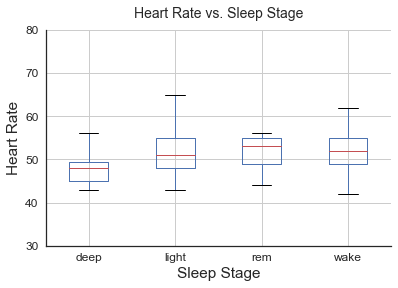

In [34]:
plt.figure(figsize = (16,8))
droped_simplified.boxplot(column = 'Heart Rate', by = 'Stage')

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_ylim([30, 80])
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 

plt.title('')
plt.suptitle('Heart Rate vs. Sleep Stage', fontsize=14)
plt.ylabel('Heart Rate')
plt.xlabel('Sleep Stage')